In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [2]:
train=pd.read_csv('archive/fashion-mnist_train.csv')

In [3]:
print(train.shape)
train.head()

(60000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test=pd.read_csv('archive/fashion-mnist_test.csv')

In [5]:
print(test.shape)
test.head()

(10000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Separating feature vectors and the label
X_train=train.drop('label',1)
y_train=train['label']

# Converting to numpy ndarray
X_train=X_train.to_numpy()

# Reshaping from 3D tensor to 4D tensor
X_train=X_train.reshape(60000,28,28,1)

C:\Users\BIT\AppData\Local\Temp\ipykernel_4200\1542336478.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train=train.drop('label',1)


In [7]:
# Separating feature vectors and the label
X_test=test.drop('label',1)
y_test=test['label']

# Converting to numpy ndarray
X_test=X_test.to_numpy()
X_test=X_test.reshape(10000,28,28,1)

# Reshaping from 3D tensor to 4D tensor
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

C:\Users\BIT\AppData\Local\Temp\ipykernel_4200\3392137696.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test=test.drop('label',1)


'Pullover'

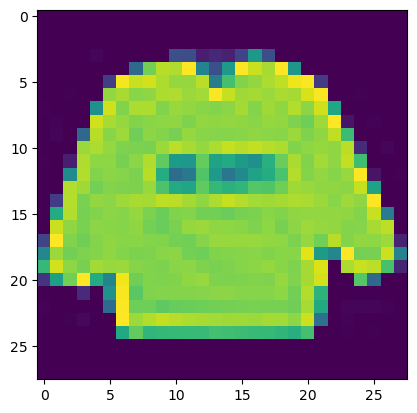

In [8]:
labels=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
plt.imshow(X_train[0].reshape(28,28))
labels[y_train[0]]

In [9]:
# Normalizing data
X_train=X_train/255.0
X_test=X_test/255.0

In [10]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=X_train[0].shape))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))    # reduce overfitting

model.add(Flatten())    # converting to 1-D array
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))   # Output layer for 10-class classification

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [12]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
hist=model.fit(X_train,y_train,batch_size=128,epochs=10,validation_data=(X_test,y_test),verbose=1)   
# testing data is set as validation data

Epoch 1/10
469/469 [==============================] - 64s 136ms/step - loss: 0.5345 - accuracy: 0.8112 - val_loss: 0.3155 - val_accuracy: 0.8883
Epoch 2/10
469/469 [==============================] - 60s 128ms/step - loss: 0.3508 - accuracy: 0.8740 - val_loss: 0.2707 - val_accuracy: 0.9046
Epoch 3/10
469/469 [==============================] - 61s 129ms/step - loss: 0.3022 - accuracy: 0.8921 - val_loss: 0.2392 - val_accuracy: 0.9105
Epoch 4/10
469/469 [==============================] - 63s 135ms/step - loss: 0.2701 - accuracy: 0.9026 - val_loss: 0.2255 - val_accuracy: 0.9175
Epoch 5/10
469/469 [==============================] - 63s 135ms/step - loss: 0.2465 - accuracy: 0.9101 - val_loss: 0.2242 - val_accuracy: 0.9172
Epoch 6/10
469/469 [==============================] - 66s 141ms/step - loss: 0.2270 - accuracy: 0.9160 - val_loss: 0.2193 - val_accuracy: 0.9183
Epoch 7/10
469/469 [==============================] - 59s 126ms/step - loss: 0.2134 - accuracy: 0.9211 - val_loss: 0.2040 - val_ac

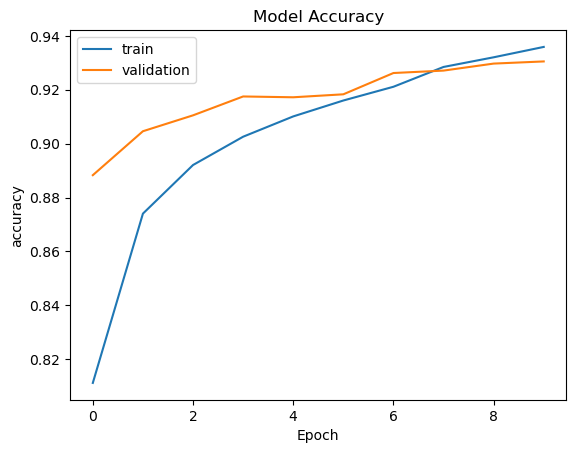

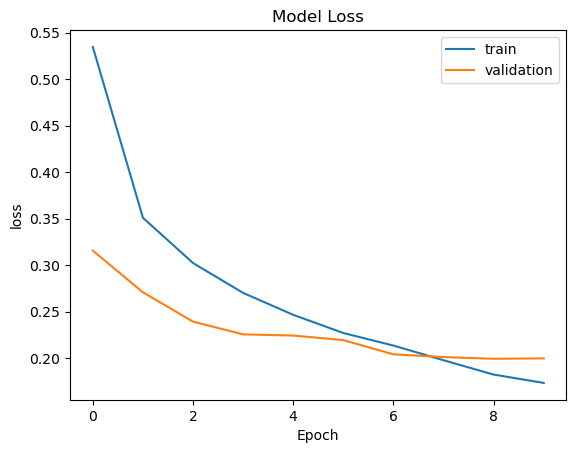

In [14]:
plt.title('Model Accuracy')
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(labels=['train','validation'])
plt.show()

plt.title('Model Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(labels=['train','validation'])
plt.show()

In [15]:
y_p=model.predict(X_test)

In [16]:
y_p

array([[9.9991119e-01, 6.3201250e-12, 1.1602777e-06, ..., 2.4491566e-14,
        1.3539682e-09, 1.1554713e-13],
       [3.7122139e-11, 1.0000000e+00, 2.8064237e-13, ..., 1.4906934e-17,
        3.5776614e-12, 2.1710001e-16],
       [3.1807458e-03, 3.0885692e-09, 6.1364883e-01, ..., 3.0487388e-10,
        4.1750144e-07, 3.0989340e-11],
       ...,
       [6.7339168e-13, 1.0129679e-18, 1.7723540e-13, ..., 6.3332755e-15,
        1.0000000e+00, 5.2000126e-18],
       [1.8435367e-05, 9.4421422e-09, 4.7650921e-08, ..., 1.7907823e-08,
        9.9995589e-01, 1.1027619e-08],
       [2.6698892e-05, 9.9873346e-01, 7.2209727e-06, ..., 2.5939122e-09,
        5.4749325e-06, 1.6377552e-09]], dtype=float32)

In [17]:
y_pred=[]
for i in range(len(y_p)):
  y_pred.append(np.argmax(y_p[i]))

In [18]:
# Viewing predicted labels
y_pred[:10]

[0, 1, 2, 6, 3, 6, 8, 6, 5, 0]

Predicted Label :  T-shirt/top
Original image :


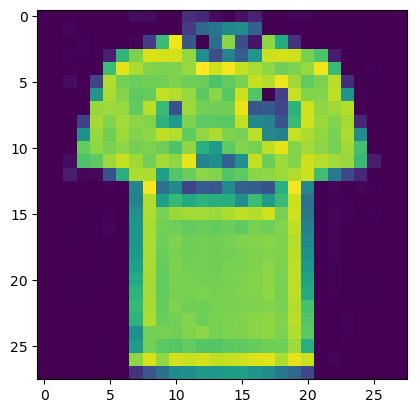

Predicted Label :  Trouser
Original image :


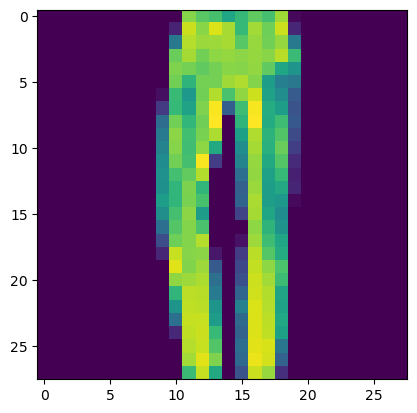

Predicted Label :  Pullover
Original image :


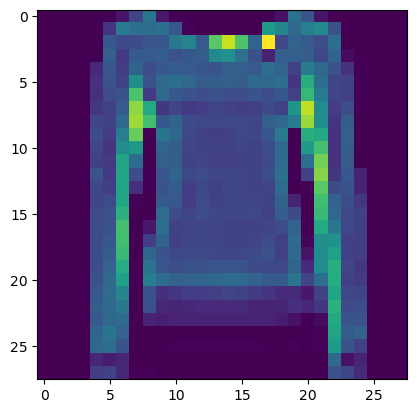

Predicted Label :  Shirt
Original image :


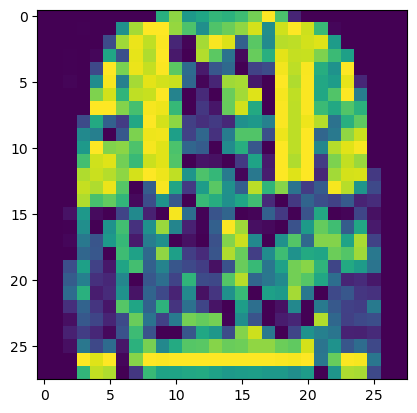

Predicted Label :  Dress
Original image :


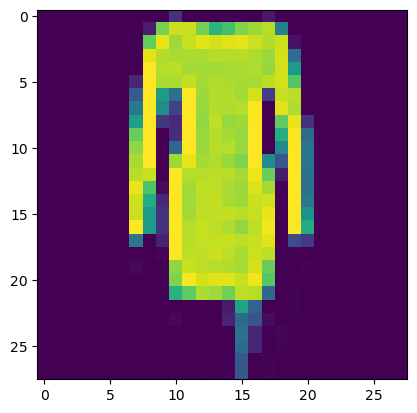

Predicted Label :  Shirt
Original image :


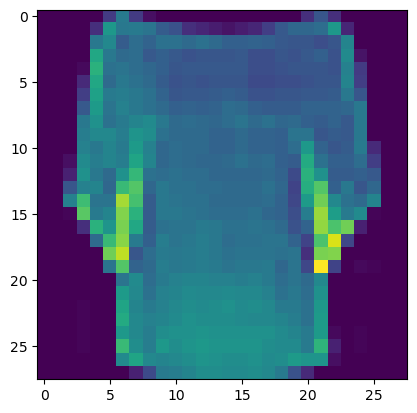

Predicted Label :  Bag
Original image :


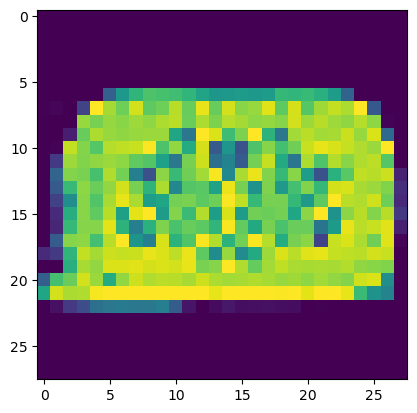

Predicted Label :  Shirt
Original image :


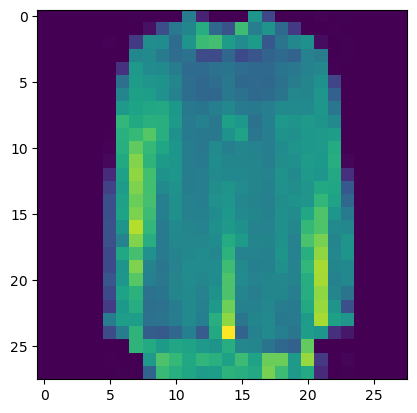

Predicted Label :  Sandal
Original image :


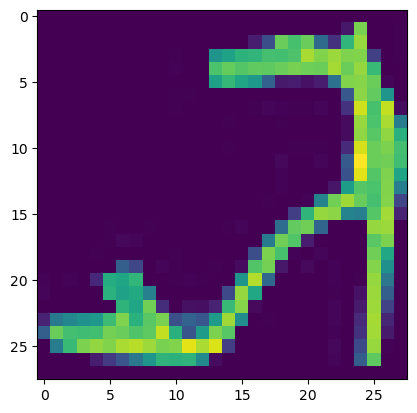

Predicted Label :  T-shirt/top
Original image :


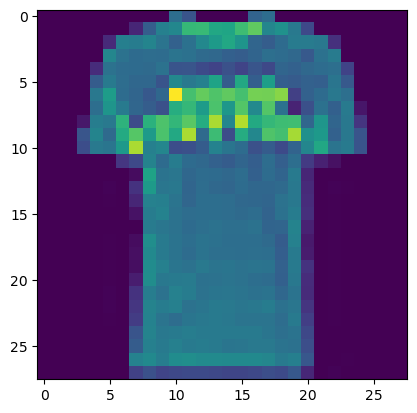

In [19]:
for i in range(10):
  print('Predicted Label : ',labels[y_pred[i]])
  print('Original image :')
  plt.imshow(X_test[i].reshape(28,28))
  plt.show()

In [20]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[843,   0,   9,  18,   1,   1, 123,   0,   5,   0],
       [  1, 987,   1,   9,   0,   0,   1,   0,   1,   0],
       [ 14,   0, 882,  12,  41,   0,  51,   0,   0,   0],
       [  6,   5,   2, 951,  15,   0,  21,   0,   0,   0],
       [  0,   0,  26,  23, 893,   0,  56,   0,   2,   0],
       [  0,   0,   0,   0,   0, 982,   0,   7,   1,  10],
       [ 68,   0,  34,  21,  36,   0, 838,   0,   3,   0],
       [  0,   0,   0,   0,   0,   4,   0, 964,   0,  32],
       [  3,   1,   2,   0,   1,   0,   4,   1, 988,   0],
       [  0,   0,   0,   0,   0,   1,   0,  22,   0, 977]], dtype=int64)

(<Figure size 900x900 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

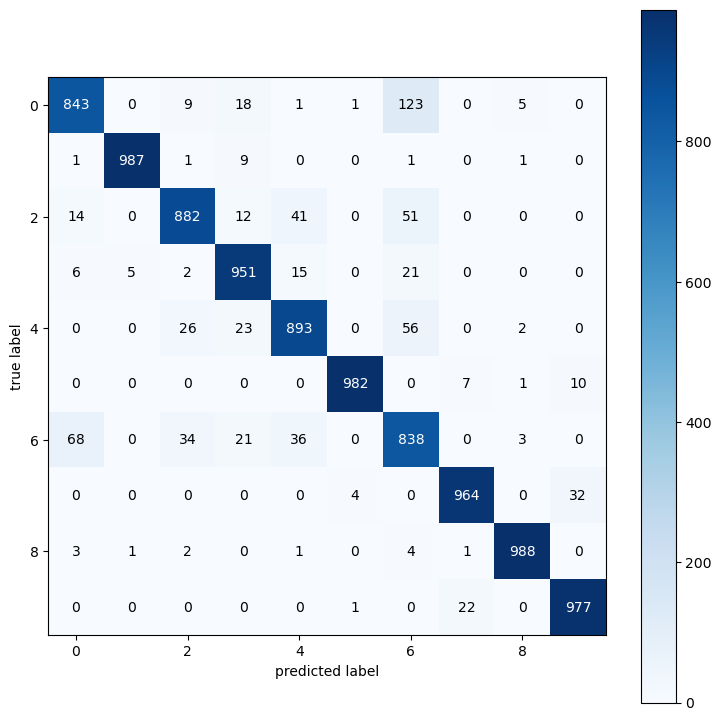

In [21]:
plot_confusion_matrix(conf_mat, figsize=(9,9), colorbar=True)
